# Praktikum Seismologi

## 1. UTCDateTime

In [32]:
from obspy.core import UTCDateTime
print (UTCDateTime("2020-07-14T10:15:00"))
print(UTCDateTime(2020,7, 14, 10, 15, 0)) # year, month, day, hour, min, sec
print(UTCDateTime(1594721700.0)) #timestamp

2020-07-14T10:15:00.000000Z
2020-07-14T10:15:00.000000Z
2020-07-14T10:15:00.000000Z


In [33]:
#atribut pada UTCDateTime
time=UTCDateTime("2020-07-14T10:15:00")
print (time.year)
print (time.julday)
print (time.timestamp)
print (time.weekday)

2020
196
1594721700.0
1


In [39]:
#Bermain dengan UTCDateTime
time1=UTCDateTime() #memanggil UTCTime sekarang
time2=UTCDateTime(2020,7,5)
print (time1)
print(time2)
print(time1.timestamp)
print(time2.timestamp)
print (time1-time2)
print(time1+3600)

2022-02-16T13:04:09.274722Z
2020-07-05T00:00:00.000000Z
1645016649.2747216
1593907200.0
51109449.274722
2022-02-16T14:04:09.274722Z


### Excercise 01
- Hitung waktu yang telah berlalu semenjak ulang tahun anda
- Buat 20 UTCDateTime objects dimulai semenjak ulang tahun anda pukul 09:00 dengan spasi 12 jam.

https://docs.obspy.org/packages/index.html
https://docs.obspy.org/tutorial/code_snippets/utc_date_time.html

## 2. Membaca Data Waveform

### Membaca dan Memplot Stream

obspy.read(): membaca data waveform ke obspy.Stream dan obspy.Trace

In [2]:
#Membaca data waveform
#Menggunakan data example dari obspy

from obspy import read 
st = read() #load example seismogram from obspy
print(st) #melihat isi dari st

3 Trace(s) in Stream:
BW.RJOB..EHZ | 2009-08-24T00:20:03.000000Z - 2009-08-24T00:20:32.990000Z | 100.0 Hz, 3000 samples
BW.RJOB..EHN | 2009-08-24T00:20:03.000000Z - 2009-08-24T00:20:32.990000Z | 100.0 Hz, 3000 samples
BW.RJOB..EHE | 2009-08-24T00:20:03.000000Z - 2009-08-24T00:20:32.990000Z | 100.0 Hz, 3000 samples


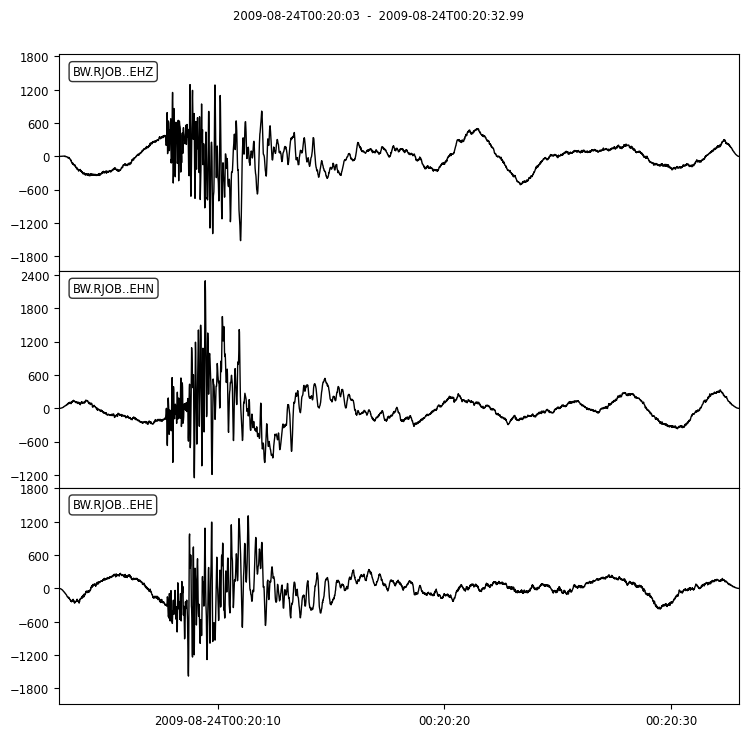

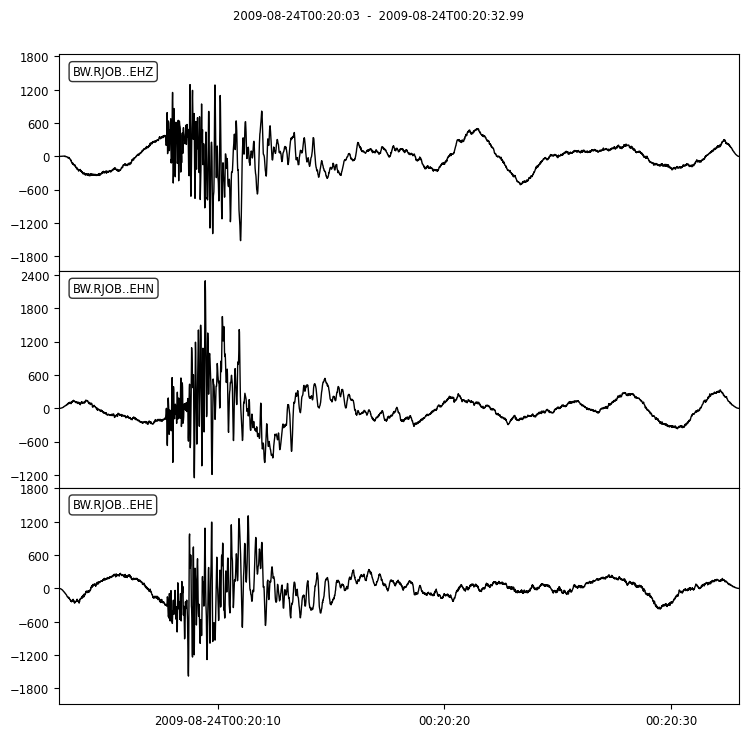

In [3]:
# Menggunakan .plot() untuk preview plot cepat
st.plot()

In [4]:
#Membaca file dari direktori kita - Mseed
st = read("./exampleData/000000000_0036EE80.mseed")  
print(st) 

3 Trace(s) in Stream:
BW.KW1..EHE | 2015-11-29T00:00:00.000000Z - 2015-11-29T00:59:59.995000Z | 200.0 Hz, 720000 samples
BW.KW1..EHN | 2015-11-29T00:00:00.000000Z - 2015-11-29T00:59:59.995000Z | 200.0 Hz, 720000 samples
BW.KW1..EHZ | 2015-11-29T00:00:00.000000Z - 2015-11-29T00:59:59.995000Z | 200.0 Hz, 720000 samples


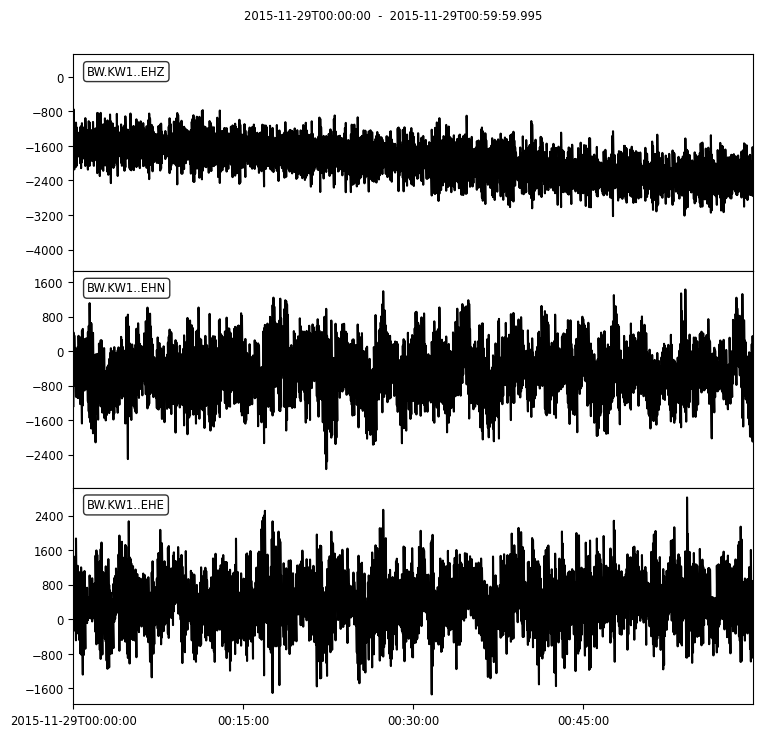

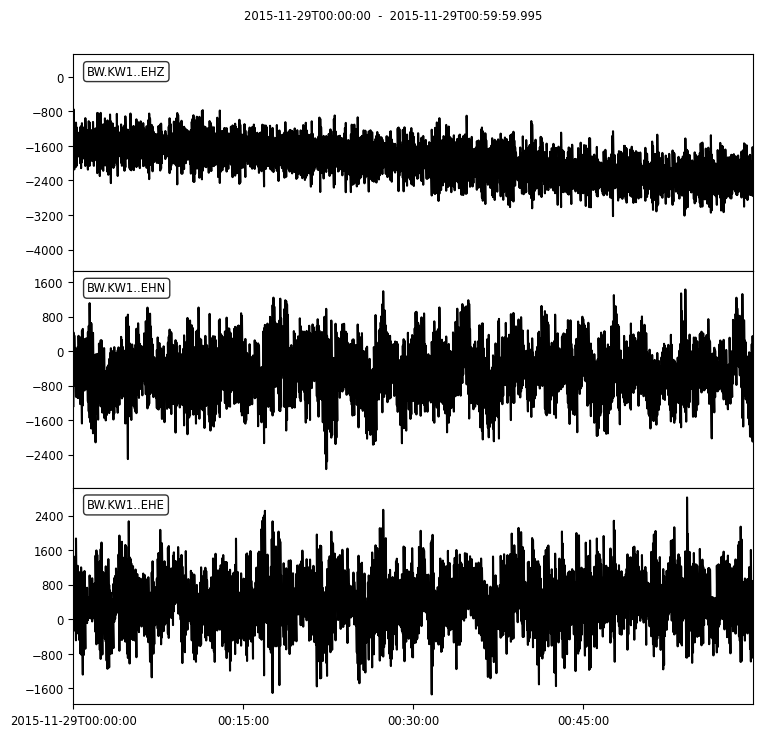

In [5]:
# Menggunakan .plot() untuk preview plot cepat
st.plot()

In [41]:
#Membaca file dari direktori kita - SAC
st = read("./exampleData/test.sac")
print(st)

# Informasi dari file SAC disimpan pada atribut .sac
st[0].stats.sac.__dict__
print(st[0])

# File tersebut dapat kita save kembali dengan cara:
st.write("temporary.sac", format="sac")

1 Trace(s) in Stream:
.STA..Q | 1978-07-18T08:00:10.000000Z - 1978-07-18T08:01:49.000000Z | 1.0 Hz, 100 samples
.STA..Q | 1978-07-18T08:00:10.000000Z - 1978-07-18T08:01:49.000000Z | 1.0 Hz, 100 samples


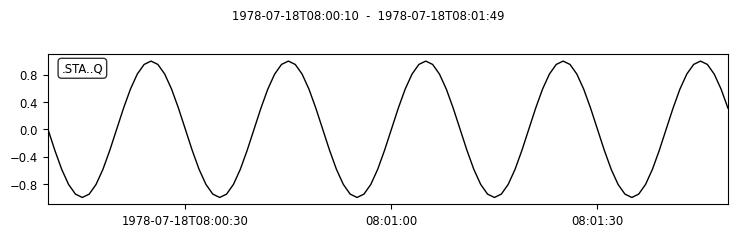

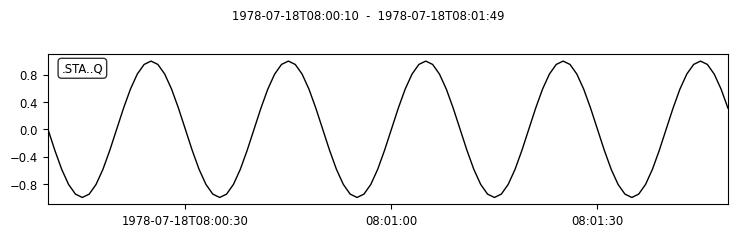

In [42]:
# Menggunakan .plot() untuk preview plot cepat
st.plot()

In [25]:
#Membaca banyak file sekaligus 
st = read("./exampleData/COP*")  
print(st) 

5 Trace(s) in Stream:
DK.COP..BHE | 2009-02-19T00:00:00.035100Z - 2009-02-19T23:59:59.985100Z | 20.0 Hz, 1728000 samples
DK.COP..BHE | 2009-02-19T00:00:00.035100Z - 2009-02-19T23:59:59.985100Z | 20.0 Hz, 1728000 samples
DK.COP..BHE | 2009-02-19T00:00:00.035100Z - 2009-02-19T23:59:59.985100Z | 20.0 Hz, 1728000 samples
DK.COP..BHN | 2009-02-19T00:00:00.025100Z - 2009-02-19T23:59:59.975100Z | 20.0 Hz, 1728000 samples
DK.COP..BHZ | 2009-02-19T00:00:00.025100Z - 2009-02-19T23:59:59.975100Z | 20.0 Hz, 1728000 samples


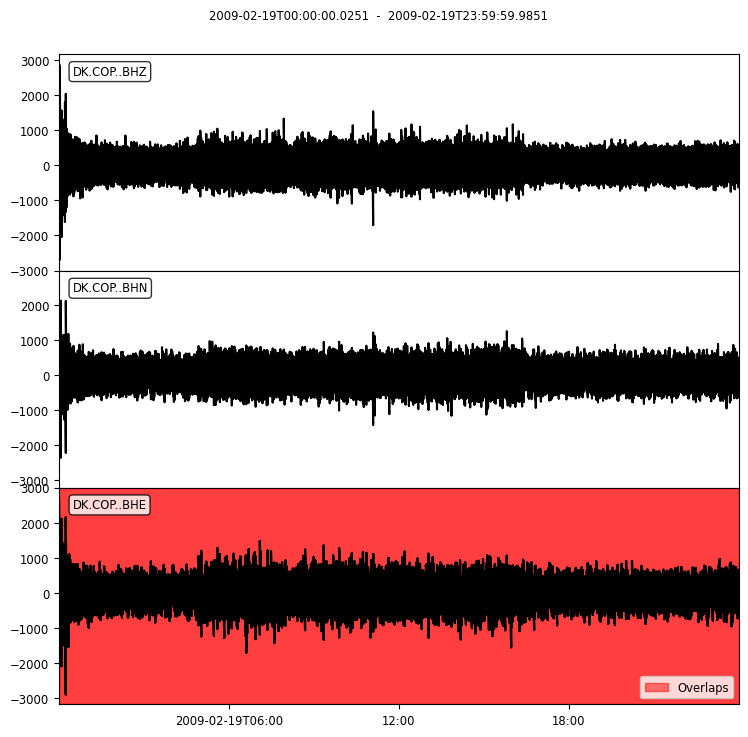

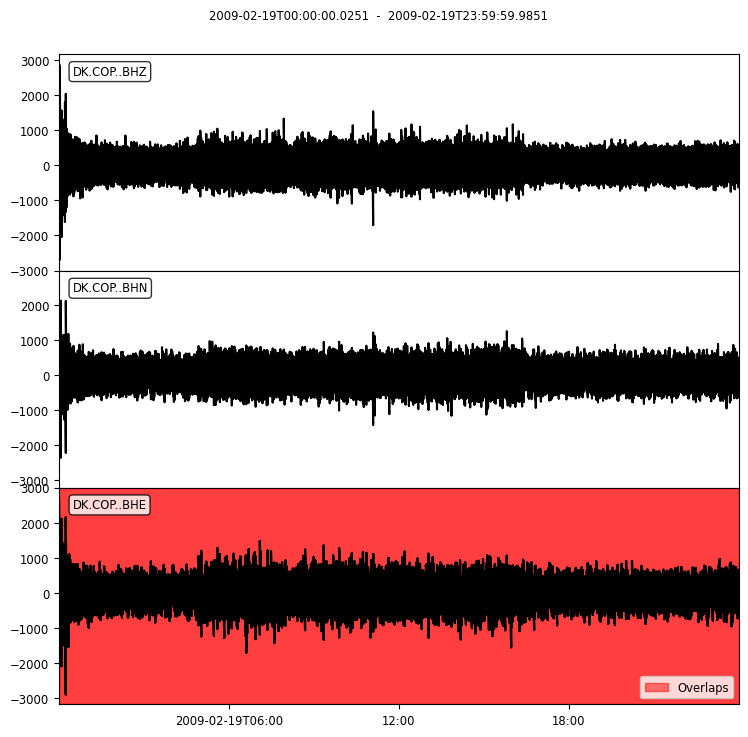

In [26]:
# Menggunakan .plot() untuk preview plot cepat
st.plot()

In [13]:
#Membaca file dari website
st = read("https://examples.obspy.org/loc_RJOB20050831023349.z")
print(st)

1 Trace(s) in Stream:
.RJOB..Z | 2005-08-31T02:33:49.850000Z - 2005-08-31T02:34:49.845000Z | 200.0 Hz, 12000 samples


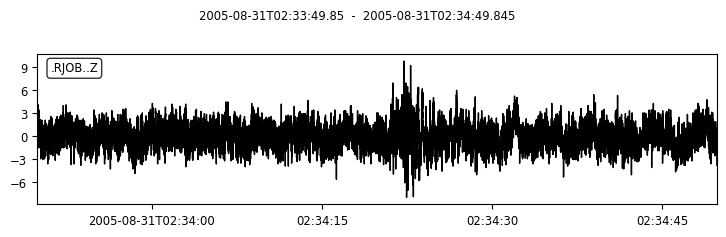

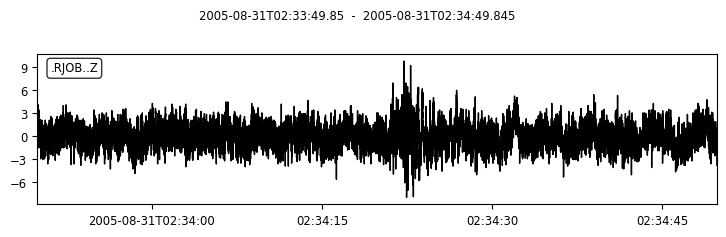

In [16]:
# Menggunakan .plot() untuk preview plot cepat
st.plot()

### Data yang bisa didownload dari obspy melalui website: https://examples.obspy.org/

### Membaca Trace

In [15]:
#Membaca Header pada trace untuk data yang ada di example data (random)
st = read('./exampleData/array_morocco_muenster_2012-08-14.mseed')
#print(st)

tr=st[0] #mengambil trace pertama dari stream
print(tr)

tr.data 
print(tr.stats)

3D.MM01..HHE | 2012-08-14T02:30:00.000000Z - 2012-08-14T04:00:00.000000Z | 20.0 Hz, 108001 samples
         network: 3D
         station: MM01
        location: 
         channel: HHE
       starttime: 2012-08-14T02:30:00.000000Z
         endtime: 2012-08-14T04:00:00.000000Z
   sampling_rate: 20.0
           delta: 0.05
            npts: 108001
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'D', 'number_of_records': 948, 'encoding': 'FLOAT32', 'byteorder': '>', 'record_length': 512, 'filesize': 20386304})


### EXCERCISE 02

- Download dari drive example data atau data mseed dari obspy, kemudian jawab hal berikut:
    1. Sebutkan nama-nama stasiun yang merekam
    2. Terdiri dari berapa komponen stasiun2 tersebut?
    3. Kapan starttime dan endtime nya?
    2. Berapa sampling rate nya?
    3. Plot komponen z saja dari waveform tersebut

## 3. Plotting Waveform

In [32]:
from obspy.core import read
threechannels = read('./exampleData/array_morocco_muenster_2012-08-14.mseed')

print(threechannels)

45 Trace(s) in Stream:

3D.MM01..HHE | 2012-08-14T02:30:00.000000Z - 2012-08-14T04:00:00.000000Z | 20.0 Hz, 108001 samples
...
(43 other traces)
...
3D.MM15..HHZ | 2012-08-14T02:30:00.000000Z - 2012-08-14T04:00:00.000000Z | 20.0 Hz, 108001 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces]


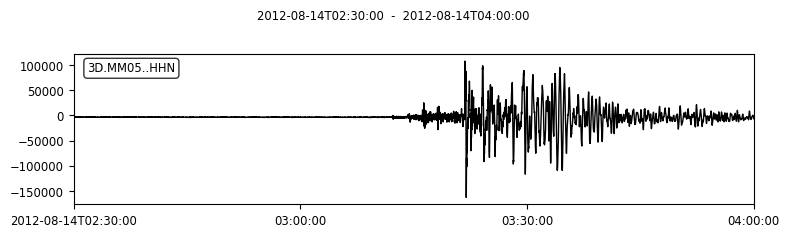

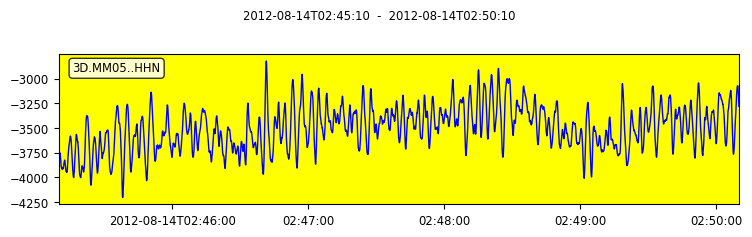

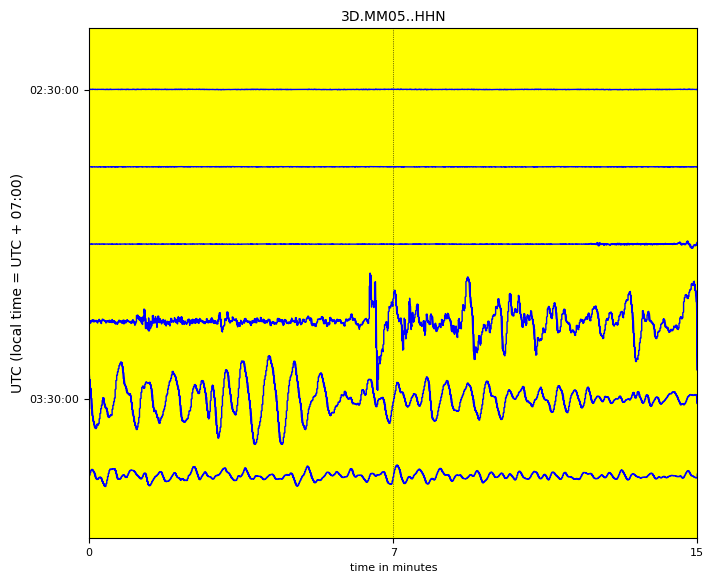

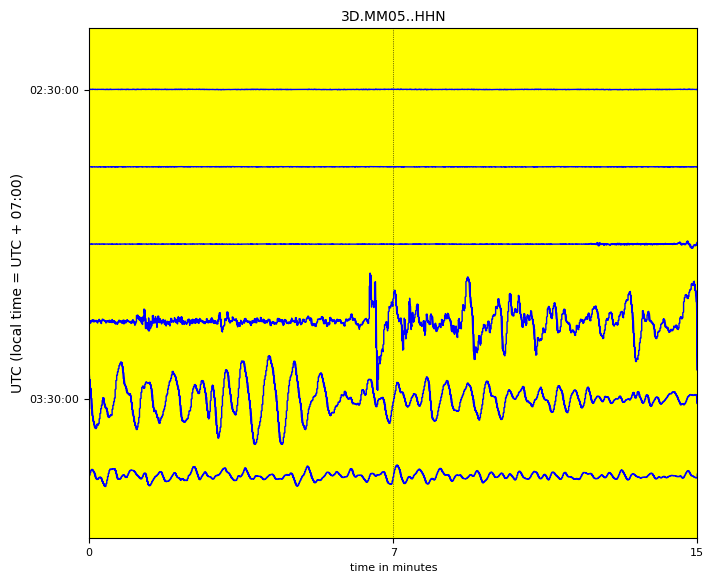

In [51]:
#Plot satu channel (!)
singlechannel=threechannels[10]
singlechannel.plot()

#Customized plot
time=UTCDateTime("2012-08-14T02:45:10")
singlechannel.plot(color='blue', bgcolor='yellow',number_of_ticks=3, starttime=time, endtime=time+5*60)

#Customized plot
singlechannel.plot(color='blue', bgcolor='yellow',number_of_ticks=3,type='dayplot')

# Excercise 03

- Plot waveform dengan panjang data hanya 10 menit yang mencakup noise dan gelombang P, Gunakan atribut starttime dan endtime pada .plot()

## 4. Station Data

In [23]:
import obspy

# Menggunakan read_inventory function untuk membuka file.
inv = obspy.read_inventory("./exampleData/BW_KW1.xml")
print(inv)

Inventory created at 2018-04-25T13:30:17.000000Z
	Created by: JANE WEB SERVICE: fdsnws-station | Jane version: 0.0.0+archive
		    http://jane/fdsnws/station/1/query?station=KW1&level=response
	Sending institution: Jane (Jane)
	Contains:
		Networks (1):
			BW
		Stations (1):
			BW.KW1 (Garching, Kirchweidach, BW-Net)
		Channels (15):
			BW.KW1..BHZ (2x), BW.KW1..BHN (2x), BW.KW1..BHE (2x), BW.KW1..EHZ, 
			BW.KW1..EHN, BW.KW1..EHE, BW.KW1..HHZ (2x), BW.KW1..HHN (2x), 
			BW.KW1..HHE (2x)


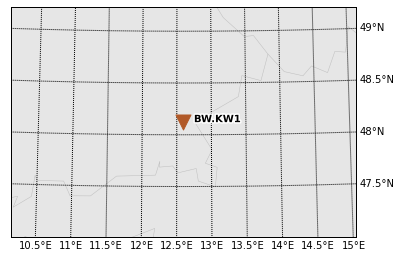

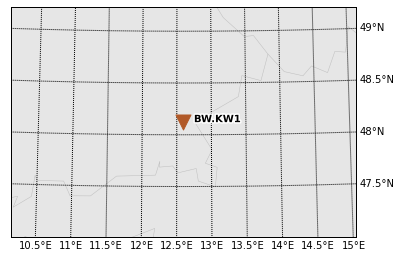

In [24]:
# Plot stasiun (!)
inv.plot(projection="local")

In [25]:
#get_coordinates digunakan untuk mendapatkan koordinat dari suatu stasiun
coordinates = inv.get_coordinates("BW.KW1..EHZ")
print(coordinates)

# Kita juga bisa menulis kembali stasiun yang kita miliki ke file lain
inv.select(channel="EHZ").write("temp.xml", format="stationxml")

{'latitude': 48.121941, 'longitude': 12.597187, 'elevation': 514.0, 'local_depth': 0.0}


## 5. Event Data

In [27]:
# Membaca quakeml dengan read_events() function.
# Data event dapat didownload dari web: usgs
cat = obspy.read_events("exampleData/2.5_day.quakeml.xml")
print(cat)

print(cat[0])

42 Event(s) in Catalog:
2020-07-13T01:33:16.150000Z | +38.194, -117.803 | 3.5 ml | automatic
2020-07-13T01:18:28.080000Z | +34.388, -119.472 | 2.82 ml | automatic
...
2020-07-12T02:49:27.614000Z | +36.363,  +70.975 | 4.3 mb | manual
2020-07-12T01:43:10.715000Z | -18.211, -178.204 | 4.5 mb | manual
To see all events call 'print(CatalogObject.__str__(print_all=True))'
Event:	2020-07-13T01:33:16.150000Z | +38.194, -117.803 | 3.5 ml | automatic

	            resource_id: ResourceIdentifier(id="quakeml:earthquake.usgs.gov/earthquakes/feed/v1.0/detail/nn00759605.quakeml")
	             event_type: 'earthquake'
	          creation_info: CreationInfo(agency_id='nn', creation_time=UTCDateTime(2020, 7, 13, 1, 38, 30, 460000), version='759605')
	    preferred_origin_id: ResourceIdentifier(id="quakeml:earthquake.usgs.gov/realtime/product/origin/nn00759605/nn/1594604310460/product.xml")
	 preferred_magnitude_id: ResourceIdentifier(id="quakeml:earthquake.usgs.gov/realtime/product/origin/nn00759605/n

C:\Anaconda\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)
C:\Anaconda\lib\site-packages\obspy\imaging\maps.py:303: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb = fig.colorbar(


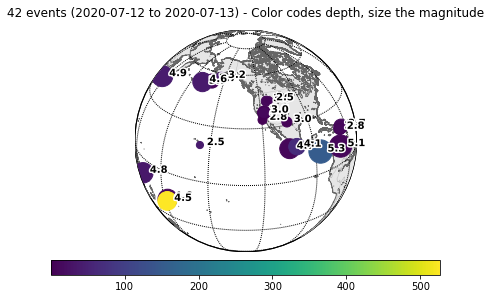

In [28]:
cat.plot(projection="ortho",resolution="i", label="magnitude");

In [30]:
cat.filter("magnitude > 3")

30 Event(s) in Catalog:
2020-07-13T01:33:16.150000Z | +38.194, -117.803 | 3.5 ml | automatic
2020-07-13T00:58:46.054000Z |  +5.145,  +94.201 | 5.0 mww | manual
...
2020-07-12T02:49:27.614000Z | +36.363,  +70.975 | 4.3 mb | manual
2020-07-12T01:43:10.715000Z | -18.211, -178.204 | 4.5 mb | manual
To see all events call 'print(CatalogObject.__str__(print_all=True))'

### Excercise 4
- Download dari USGS: Data gempa pada koordinat bebas dengan jumlah 10-15 event. 
- Plot gempa tersebut memiliki magnitude > 4

In [21]:
import os
os.environ["PROJ_LIB"] = r'C:\Anaconda\Lib\site-packages\mpl_toolkits\basemap'
os.environ["PROJ_LIB"] = r'C:\Anaconda\Library\share\basemap'